<a id='intro'></a>
# Исследование надежности заемщиков.


# Оглавление:
<a id='intro-1'></a>
- [Шаг 1. Обзор данных](#1) 
<a id='intro-2'></a>
- [Шаг 2. Предобработка данных](#2)
<a id='intro-2.1'></a>
    - [Шаг 2.1 Заполнение пропусков](#2.1)
<a id='intro-2.2'></a>
    - [Шаг 2.2 Проверка данных на аномалии и исправления.](#2.2)
<a id='intro-2.3'></a>
    - [Шаг 2.3. Изменение типов данных.](#2.3)
<a id='intro-2.4'></a>
    - [Шаг 2.4. Удаление дубликатов.](#2.4)
<a id='intro-2.5'></a>
    - [Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.](#2.5)
<a id='intro-2.6'></a>
    - [Шаг 2.6. Категоризация дохода.](#2.6)
<a id='intro-2.7'></a>
    - [Шаг 2.7. Категоризация целей кредита.](#2.7)
<a id='intro-3'></a>
- [Шаг 3. Ответы на вопросы](#3)
<a id='intro-4'></a>
- [Шаг 4. Общий вывод](#4)


# Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<a id='1'></a>
## Шаг 1. Обзор данных

Для начала откроем таблицу и изучим общую информацию о данных.(Путь к файлу: /datasets/data.csv)

In [1]:
import pandas as pd # импортируем библиотеку pandas для работы с данными.

data = pd.read_csv('/datasets/data.csv') # используем метод read_csv, чтобы прочитать csv-файл с таблицей.
data.to_csv('data.csv', index=False) 
data.info() # используем метод info(), чтобы получить общее представление о данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Пояснение к данным

children          - кол-во детей;

days_employed     - трудовой стаж в днях;

dob_years         - возраст клиента в годах;

education         - уровень образованиея клиента;

education_id      - идентификатор уровня образования клиента;

family_status     - семейное положение;

family_status_id  - идентификатор семейного положения;

gender            - пол клиента;

income_type       - тип занятости;

debt              - имел ли задолженность по возврату кредитов;

total_income      - ежемесячный доход;

purpose           - цель получения кредита;

Уже можно сделать некоторые выводы о пропусках в данных.
Одного метода info() недостаточно, чтобы получить полную картину. Воспользуемся методами head(), tail() и describe() для просмотра данных в начале и в конце таблицы, а также, чтобы посмотреть максимальные и минимальные значения в каждой таблице.

In [2]:
data.head(15) # начало таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.tail(15) # конец таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля
21511,0,-612.569129,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068.472941,покупка жилья для сдачи
21512,0,-165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301.457769,получение дополнительного образования
21513,0,-1166.216789,35,среднее,1,женат / замужем,0,F,сотрудник,0,250986.142309,покупка жилья
21514,0,-280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988.407188,строительство недвижимости
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости


In [4]:
data.describe() 

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Вывод:
Проблемы, нуждающиеся в исправлении:

- отрицательные значения в столбце days_employed, children
- аномально большие значения в столбце days_employed
- пропуски данных в столбцах days_employed и total_income
- неккоректные типы данных в столбцах total_income и days_employed
- total_income валюта (?), за сколько месяцев, лет (?)
- days_employed лучше перевести в года(years_employed)
- излишняя категоризация данных усложняющая работу(education - education_id, family_status - family_status_id)
- наименования в столбце education дублируются(отличаются только регистром)
- min в dob_years равен 0
- некорректные названия столбцов

[К оглавлению](#intro)

## <a id='2'></a>

<a id='2.1'></a>
### Шаг 2.1 Заполнение пропусков

Для удобства работы с таблицей для начала переименуем столбцы:

In [5]:
columns = data.columns.tolist() # сохраним названия колонок в отдельную переменную.

 # переименовываем столбцы children, days_employed, dob_years, education, education_id, income_type и total_income
data = data.rename(columns = {'children':'number_of_children','days_employed':'years_employed','dob_years':'client_age','education':'education_level','education_id':'education_level_id','income_type':'employment', 'total_income':'monthly_income'})

# распечатаем новые названия колонок
data.columns.tolist()

['number_of_children',
 'years_employed',
 'client_age',
 'education_level',
 'education_level_id',
 'family_status',
 'family_status_id',
 'gender',
 'employment',
 'debt',
 'monthly_income',
 'purpose']

#### Пояснения V2.0
Снова дадим пояснения, они понадобятся в будущем для работы с данными, если кто-то еще захочет работать с таблицей.

number_of_children- кол-во детей;

years_employed    - трудовой стаж в днях;

client_age        - возраст клиента в годах;

education_level         - уровень образованиея клиента;

education_level_id      - идентификатор уровня образования клиента;

family_status     - семейное положение;

family_status_id  - идентификатор семейного положения;

gender            - пол клиента;

employment      - тип занятости;

debt              - имел ли задолженность по возврату кредитов;

monthly_income      - ежемесячный доход;

purpose           - цель получения кредита;

#### Найдем пропуски.


In [6]:
data.isna().sum()

number_of_children       0
years_employed        2174
client_age               0
education_level          0
education_level_id       0
family_status            0
family_status_id         0
gender                   0
employment               0
debt                     0
monthly_income        2174
purpose                  0
dtype: int64

2174 пропуска в столбцах years_employed и monthly_income. 
Возможно это никогда не работавшие люди. Также, это может быть связано, как с человеческим фактором, так и с некорректной выгрузкой данных.

Устраним пропуски заменив их на нули, пока что. 

In [7]:
data['years_employed'] = data['years_employed'].fillna(0) # заполняем пропуски в столбце years_employed
data['monthly_income'] = data['monthly_income'].fillna(0) # заполняем пропуски в столбце monthly_income

data.isna().sum() # проверим кол-во пропусков после исправлений

number_of_children    0
years_employed        0
client_age            0
education_level       0
education_level_id    0
family_status         0
family_status_id      0
gender                0
employment            0
debt                  0
monthly_income        0
purpose               0
dtype: int64

#### Вывод:

Пропуски успешно устранены.

Почему не заполняем пропуска медианным значением на данном этапе?

Сейчас в столбцах присутствуют отрицательные, плавающие, аномально большие значения, которые могут искажать действительную картинку.

Для начала нужно устранить аномалии в данных.

[К оглавлению](#intro)

<a id='2.2'></a>
### Шаг 2.2 Проверка данных на аномалии и исправления.

#### Отрицательные значения

Первым делом разберемся с отрицательными значениями в столбцах years_employed и number_of_children

In [8]:
data['years_employed'] = data['years_employed'].abs() # берем значения по модулю в столбце years_employed
data['number_of_children'] = data['number_of_children'].abs() # берем значения по модулю в столбце number_of_children

In [9]:
# Проверим методом describe()
data['years_employed'].describe()

count     21525.000000
mean      60156.419005
std      133355.929525
min           0.000000
25%         610.652074
50%        1808.053434
75%        4779.587738
max      401755.400475
Name: years_employed, dtype: float64

In [10]:
# Проверим методом describe()
data['number_of_children'].describe()

count    21525.000000
mean         0.543275
std          1.379876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: number_of_children, dtype: float64

Избавились от отрицательных значений. Займемся аномальными.

#### Аномальные значения

Посмотрев на аномальные значения в столбце years_employed, можно выдвинуть гипотезу о том, что время указано в часах, а не в днях, как это было задумано изначально. 

In [11]:
print(data.loc[4,'years_employed']/365)

932.2358138269094


У клиента возрастом 53 года стаж близок к 1000 лет, что разумеется невозможно. Проверим являются ли указанные значения часами

In [12]:
print(data.loc[4]) # выведем строку клиента

number_of_children                   0
years_employed           340266.072047
client_age                          53
education_level                среднее
education_level_id                   1
family_status         гражданский брак
family_status_id                     1
gender                               F
employment                   пенсионер
debt                                 0
monthly_income            158616.07787
purpose                сыграть свадьбу
Name: 4, dtype: object


In [13]:
# возьмем значение стажа клиента и подделим его сначала на 24, чтобы получить дни, а затем на 365, чтобы получить года
print(data.loc[4,'years_employed']/(24*365)) 

38.84315890945456


38 лет стажа выглядят куда более реалистично для человека возрастом 53 года. Гипотеза подтвердилась займемся исправлением.

Просто взять и конвертировать все данные в года мы не можем потому, что какие-то данные изначально были указаны правильно.

In [14]:
# Найдем самого старого человека в наборе
max_days_of_employment = (data['client_age'].max() - 16) * 365
# Если предположить, что он работал с 16 лет, то:
max_days_of_employment # Получим максимальное кол-во дней которое бы смог проработать человек с 16 лет

21535

#### Какой процент от всех
Найдем какой процент от всех данных составляют аномальные значения:

In [15]:
print(data[data['years_employed'] > max_days_of_employment]['years_employed'].count() / 21525 * 100, '%')

16.004645760743323 %


Довольно большая доля, которая могла бы повлиять на конечный результат.

Принимаемся за исправления. Переведем все значения в года.

In [16]:
data['years_employed'] = data['years_employed'] / 365 # делим на 365, чтобы получить значение в годах.
data.head() # проверяем

,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,932.235814,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Пользуясь выводами сделанными ранее, сделаем условие по которому будем делить на 24 все значения years_employed, которые больше возраста клиента, уменьшенного на 16.

In [17]:
# Напишем функцию возвращающую значение стажа / 24, в случае если стаж больше максмально допустимого, 
# с учетом того, что клиент работал не покладая рук с 16 лет.
def correct_age(data):
    years_employed = data['years_employed'] # стаж фактический
    max_years = data['client_age'] - 16 # стаж макстмальный
    if years_employed > max_years: # условие (если стаж.ф больше стаж.м, тогда возвращаем стаж.ф, деленный на 24)
        return years_employed / 24
    else:
        return years_employed # если нет, то просто возвращаем старое значение

data['years_employed'] = data.apply(correct_age, axis=1) # применяем функцию ко всей таблице 
data.head() # для проверки воспользуемся head()

,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,38.843159,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


#### Ответ на вопрос
Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?

Медиана поможет найти именно тот показатель, который ближе всего к истинно среднему. На неё не влияют выбивающиеся из общей массы числа, поэтому она считается одним из самых надёжных и устойчивых показателей. Так, для упомянутого выше ряда «1, 2, 1, 1, 3, 8, 10, 1, 587» медиана будет равна 2. 

#### Заполнение медианным значением.
После устранения значительной доли некорректных значений, мы можем привести пропущенные значения к медианному значению.

In [18]:
data.describe() # проверим меданные значения

,number_of_children,years_employed,client_age,education_level_id,family_status_id,debt,monthly_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.543275,11.313747,43.293380,0.817236,0.972544,0.080883,1.505128e+05
std,1.379876,14.410821,12.574584,0.548138,1.420324,0.272661,1.098972e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.595400,33.000000,1.000000,0.000000,0.000000,8.861283e+04
50%,0.000000,4.853052,42.000000,1.000000,0.000000,0.000000,1.355147e+05
75%,1.000000,12.838662,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,45.862489,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [19]:
data.loc[data['years_employed'] == 0,'years_employed'] = data['years_employed'].mean() # приравниваем к медианному значению
print(data.loc[12,'years_employed']) # проверяем
data.head(15)

11.313747430607679


,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,38.843159,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,2.537495,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,7.888225,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,0.418574,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,18.985932,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,5.996593,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Все сходится. Аналогично для monthly_income:

In [20]:
data.loc[data['monthly_income'] == 0,'monthly_income'] = data['monthly_income'].mean()
print(data.loc[12,'monthly_income'])
data.head(15)

150512.84413613725


,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,38.843159,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,2.537495,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,7.888225,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,0.418574,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,18.985932,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,5.996593,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Другие ангомалии

Также были обнаружены в столбцах number_of_children, gender и client_age(dob_years).

In [21]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Аномалия в gender всего 1 и она не оказывает значительного влияния. Возможно - это опечатка или кто-то нехтел указывать свой пол.

Рассмотрим аномальные значения в столбце client_age:

In [22]:
data['client_age'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: client_age, dtype: int64

Всего 101 значение. В обоих случаях(2 и 0), возможно были опечатки(например: забыли поставить число десятков или единиц).
Значительного влияния на дальнейшее исследование не оказывает.

Разберемся с number_of_children.

In [23]:
data['number_of_children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: number_of_children, dtype: int64

76 значений из 21525 аномальны. Вполне вероятно, что это опечатки(например: хотели добавить 2, но случайно набрали 20). 

Руководствуясь тем, что аномалии составляет всего лишь ~0.35%, можно привести аномальные значения к 2.

In [24]:
data.loc[data['number_of_children'] == 20, 'number_of_children'] = 2

Проверка:

In [25]:
data['number_of_children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: number_of_children, dtype: int64

Аномалия исправлена.

In [26]:
# Код ревьюера
data[data['purpose'] == 2]

,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose


#### Вывод:
На данном этапе устранили аномальные и отрицательные значения в таблице и заполнили их медианным значением.

[К оглавлению](#intro)

<a id='2.3'></a>
### Шаг 2.3. Изменение типов данных.

#### Типы данных
Заменим типы данных в столбцах years_employed, monthly_inсome на целочисленный для более легкой работы с данными


In [27]:
data['years_employed'] = data['years_employed'].astype('int') # приводим значения в столбце years_employed к int
data['monthly_income'] = data['monthly_income'].astype('int') # приводим значения в столбце monthly_income к int
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   number_of_children  21525 non-null  int64 
 1   years_employed      21525 non-null  int64 
 2   client_age          21525 non-null  int64 
 3   education_level     21525 non-null  object
 4   education_level_id  21525 non-null  int64 
 5   family_status       21525 non-null  object
 6   family_status_id    21525 non-null  int64 
 7   gender              21525 non-null  object
 8   employment          21525 non-null  object
 9   debt                21525 non-null  int64 
 10  monthly_income      21525 non-null  int64 
 11  purpose             21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Типы данных исправлены верно, но для их проверки лучше использовать методы info() или dtypes😉</div>

#### Вывод
На данном этапе привели значения в столбцах years_employed и monthly_income к целочисленному типу.

[К оглавлению](#intro)

<a id='2.4'></a>
### Шаг 2.4. Удаление дубликатов.

Для начала посмотрим количество явных дубликатов.

In [28]:
data.duplicated().sum() # найдем кол-во дубликатов при помощи методов duplicated() и sum()

54

54 явных дубликата. Удаляем:

In [29]:
# при удалении применим методы drop_duplicates() и reset_index() для сохранения порядка
data = data.drop_duplicates().reset_index(drop = True) 
data.duplicated().sum() # проверяем

0

Займемся удалением неявных дубликатов в столбце education_level. Приведем значения к одному регистру при помощи
lower(), так как значения повторяются.

In [30]:
data['education_level'].value_counts() # применяем метод value_counts(), к столбцу education_level

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education_level, dtype: int64

In [31]:
data['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [32]:
data['employment'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: employment, dtype: int64

Из всех столбцов со строками значения повторяются неявно только в education_level

In [33]:
data['education_level'] = data['education_level'].str.lower() # приведем все значения к одному виду
data.head()

,number_of_children,years_employed,client_age,education_level,education_level_id,family_status,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Посчитаем кол-во уникальных значений и их кол-во:

In [34]:
data['education_level'].value_counts() # применяем метод value_counts(), к столбцу education_level

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education_level, dtype: int64

Снова посчитаем кол-во дубликатов:

In [35]:
data.duplicated().sum()

17

Нашли еще 17 дубликатов. Удаляем:

In [36]:
data = data.drop_duplicates() # удаляем
data.duplicated().sum() # проверяем

0

#### Причины появления:
- человеческий фактор
- какой-то сбой сбивший регистры у некоторых ячеек

#### Вывод:
На данном этапе из таблицы были удалены явные и неявные дубликаты.

[К оглавлению](#intro)

<a id='2.5'></a>
### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим словари education_level_dict и family_status_dict для упрощения таблицы:

In [37]:
# создаем словари
education_level_dict = data[['education_level_id','education_level']]
family_status_dict = data[['family_status_id','family_status']]

# удаляем дубликаты
education_level_dict = education_level_dict.drop_duplicates().reset_index(drop = True)
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop = True)

In [38]:
education_level_dict.head() # словарь education_level

,education_level_id,education_level
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [39]:
family_status_dict.head() # словарь family_status

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [40]:
# удаляем столбцы education_level, family_status
del data['education_level']
del data['family_status']
data.head() # проверяем

,number_of_children,years_employed,client_age,education_level_id,family_status_id,gender,employment,debt,monthly_income,purpose
0,1,23,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,38,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


#### Вывод:
Успешно. На данном этапе создали словари, чтобы убрать лишние столбцы из таблицы. С данными стало работать еще проще.

[К оглавлению](#intro)

<a id='2.6'></a>
### Шаг 2.6. Категоризация дохода.

Создадим функцию для категоризации дохода. Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [41]:
def income_category(data): 

    monthly_income = data['monthly_income'] # получаем значение monthly_income

    #присваиваем категории в зависимости от дохода
    
    if monthly_income <= 30000:
        return 'E'
    if monthly_income <= 50000:
        return 'D'
    if monthly_income <= 200000:
        return 'C'
    if monthly_income <= 1000000:
        return 'B'
    if monthly_income > 1000000:
        return 'A'
    

data['monthly_income_category'] = data.apply(income_category, axis=1) # применяем функцию к таблице
data.head(10) # проверяем

,number_of_children,years_employed,client_age,education_level_id,family_status_id,gender,employment,debt,monthly_income,purpose,monthly_income_category
0,1,23,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,11,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,15,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,11,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,38,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,2,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,7,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,0,50,1,0,M,сотрудник,0,135823,образование,C
8,2,18,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,5,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


#### Вывод:
На данном этапе при помощи функции добавили в таблицу столбец с категориями доходов для каждого клиента.

[К оглавлению](#intro)

<a id='2.7'></a>
### Шаг 2.7. Категоризация целей кредита.

Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

'операции с автомобилем',
'операции с недвижимостью',
'проведение свадьбы',
'получение образования'.

Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.

In [42]:
data['purpose'].value_counts() # разделим на категории 

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Можно разделить на следующие категории: оперцации с образованием, операции по свадьбам, операции с автомобилем, операции с недвижимостью

In [43]:
def purpose_category(data): # функция purpose_category для категоризации целей кредита
    
    purpose = data['purpose'] # присваиваем purpose цели из таблицы
        
    # присвоение категории кредитным оперциям
    if 'образов' in purpose:
        return 'операции с образованием'
    if 'свадьб' in purpose:
        return 'операции по свадьбам'
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    if 'недвижим' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    
data['purpose_category'] = data.apply(purpose_category, axis = 1) # применяем функцию к data
data.head(10) # проверяем

,number_of_children,years_employed,client_age,education_level_id,family_status_id,gender,employment,debt,monthly_income,purpose,monthly_income_category,purpose_category
0,1,23,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,11,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,15,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,11,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,операции с образованием
4,0,38,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,операции по свадьбам
5,0,2,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,7,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,0,50,1,0,M,сотрудник,0,135823,образование,C,операции с образованием
8,2,18,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,операции по свадьбам
9,0,5,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Проверим каждому ли клиенту присвоилась категория:

In [44]:
data['purpose_category'].value_counts() # считаем уникальные значения

операции с недвижимостью    10811
операции с автомобилем       4306
операции с образованием      4013
операции по свадьбам         2324
Name: purpose_category, dtype: int64

#### Вывод:
На данном этапе категоризовали кредиты по их целям.

[К оглавлению](#intro)

<a id='3'></a>
## Ответы на вопросы.

In [45]:
import seaborn as sea

##### Вопрос 1:
Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для начала найдем коэффициент отдачи кредитов в зависимости от кол-ва детей.

In [46]:
number_of_children_debt = (data.groupby('number_of_children')['debt'].sum())/(data.groupby('number_of_children')['debt'].count()) *100
number_of_children_debt

number_of_children
0    7.543822
1    9.165808
2    9.492481
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

Составим сводную таблицу. Для наглядности коэффициента отдачи кредитов.

In [47]:
children_pivot = data.pivot_table(index = ['number_of_children'], columns = ['debt'], values = 'purpose', aggfunc='count')

children_pivot['ratio'] = children_pivot[1] / children_pivot[0] * 100
children_pivot

debt,0,1,ratio
number_of_children,,,
0,13028.0,1063.0,8.159349
1,4410.0,445.0,10.090703
2,1926.0,202.0,10.488058
3,303.0,27.0,8.910891
4,37.0,4.0,10.810811
5,9.0,NaN,NaN


In [48]:
data['number_of_children'].value_counts() # найдем кол-во семей с определенным кол-вом детей

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: number_of_children, dtype: int64

<AxesSubplot:xlabel='number_of_children', ylabel='debt'>

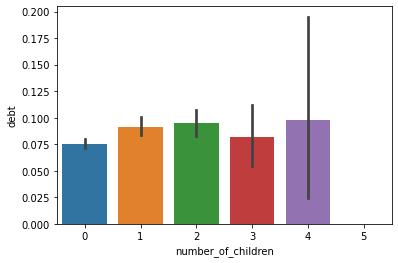

In [49]:
sea.barplot(x="number_of_children", y="debt", data=data) # график для большей наглядности

#### Вывод:
Люди с детьми или без отдают кредиты примерно на одном и том же уровне. Разница примерно 1~2%
Люди с 5 детьми показывают 0, но выборка по ним не показательна из-за маленького кол-ва семей с 5 детьми.

##### Вопрос 2:
Есть ли зависимость между семейным положением и возвратом кредита в срок?

Действуем аналогично с предыдущим вопросом.

In [50]:
family_status_debt = (data.groupby('family_status_id')['debt'].sum())/(data.groupby('family_status_id')['debt'].count()) *100
family_status_debt

family_status_id
0    7.545182
1    9.347145
2    6.569343
3    7.112971
4    9.750890
Name: debt, dtype: float64

#### Пояснения

0 - женат / замужем

1 - гражданский брак

2 - вдовец / вдова

3 - в разводе

4 - Не женат / не замужем

In [51]:
f_status_pivot = data.pivot_table(index = ['family_status_id'], columns = ['debt'], values = 'purpose', aggfunc='count')

f_status_pivot['ratio'] = f_status_pivot[1] / f_status_pivot[0] * 100
f_status_pivot

debt,0,1,ratio
family_status_id,,,
0,11408,931,8.160940
1,3763,388,10.310922
2,896,63,7.031250
3,1110,85,7.657658
4,2536,274,10.804416


In [52]:
data['family_status_id'].value_counts() # найдем кол-во семей с определенным кол-вом детей

0    12339
1     4151
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64

<AxesSubplot:xlabel='family_status_id', ylabel='debt'>

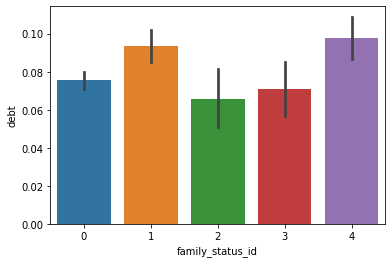

In [53]:
sea.barplot(x = 'family_status_id', y = 'debt', data = data)

#### Вывод:
Семейное положение влияет.
Самые низкие показатели у разведенных и вдов, а самая высокая у семей и одиночек, что можно объяснить общим доходом семьи и отсутствием лишних трат в случае одиночек.

##### Вопрос 3:
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Действуем аналогично с предыдущим вопросом.

In [54]:
income_debt = (data.groupby('monthly_income_category')['debt'].sum())/(data.groupby('monthly_income_category')['debt'].count()) *100
income_debt

monthly_income_category
A    8.000000
B    7.062091
C    8.491508
D    6.000000
E    9.090909
Name: debt, dtype: float64

#### Пояснения

0–30000 — 'E';

30001–50000 — 'D';

50001–200000 — 'C';

200001–1000000 — 'B';

1000001 и выше — 'A'.

In [55]:
income_pivot = data.pivot_table(index = ['monthly_income_category'], columns = ['debt'], values = 'purpose', aggfunc='count')

income_pivot['ratio'] = income_pivot[1] / income_pivot[0] * 100
income_pivot

debt,0,1,ratio
monthly_income_category,,,
A,23,2,8.695652
B,4685,356,7.598719
C,14656,1360,9.279476
D,329,21,6.382979
E,20,2,10.000000


In [56]:
data['monthly_income_category'].value_counts()

C    16016
B     5041
D      350
A       25
E       22
Name: monthly_income_category, dtype: int64

<AxesSubplot:xlabel='monthly_income_category', ylabel='debt'>

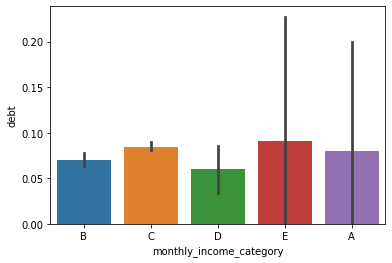

In [57]:
sea.barplot(x = 'monthly_income_category', y = 'debt', data = data)

#### Вывод:
Есть незначительная разница в возвращаемости кредитов от уровня доходов.
Хуже всего покатель у людей со высокими, средними и низкими доходами. 

Если зависимость возвращаемости кредитов у людей с низкими доходами очевидна, то у людей с высокими скорее всего связана с использованием кредитов, как инструмента получения дохода. 

Лучше всего возвращают люди достатка ниже среднего и выше среднего.

##### Вопрос 4:
Как разные цели кредита влияют на его возврат в срок?

Действуем аналогично с предыдущим вопросом.

In [58]:
purpose_debt = (data.groupby('purpose_category')['debt'].sum())/(data.groupby('purpose_category')['debt'].count()) *100
purpose_debt

purpose_category
операции по свадьбам        8.003442
операции с автомобилем      9.359034
операции с недвижимостью    7.233373
операции с образованием     9.220035
Name: debt, dtype: float64

In [59]:
purpose_pivot = data.pivot_table(index = ['purpose_category'], columns = ['debt'], values = 'purpose', aggfunc='count')

purpose_pivot['ratio'] = purpose_pivot[1] / purpose_pivot[0] * 100
purpose_pivot

debt,0,1,ratio
purpose_category,,,
операции по свадьбам,2138,186,8.699719
операции с автомобилем,3903,403,10.325391
операции с недвижимостью,10029,782,7.797388
операции с образованием,3643,370,10.156464


In [60]:
data['purpose_category'].value_counts()

операции с недвижимостью    10811
операции с автомобилем       4306
операции с образованием      4013
операции по свадьбам         2324
Name: purpose_category, dtype: int64

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

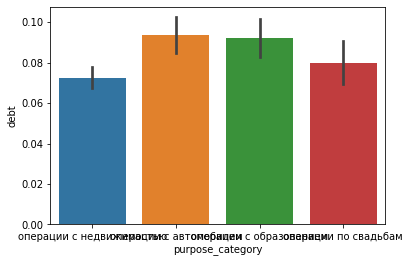

In [61]:
sea.barplot(x = 'purpose_category', y = 'debt', data = data)

#### Вывод:
Цели кредита влияют.
Свадьбы и недвижимость показывают самые худшие результаты. 
Недвижимость скорее всего связана с ипотекой, которую обычно берут на много лет, а иногда и просрачивают платежи.
Кредит на свадьбы не имеет смысл, как такового ведь из него нельзя получить выгоду как из других.

К примеру недвижимость можно сдавать, на автомобиле подрабатывать или перепродавать, а образование позволяет получать новые источники дохода.

[К оглавлению](#intro)

<a id='4'></a>
## Общий вывод:

### Итоги работы:

* Пропуски, аномальные, отрицательные и значения-дубликаты в данных лустранены, 
* Данные приведены к более удобному виду для работы виду, а столбцы переименованы для большей понятности
* Клиенты были категоризированы по уровню дохода и по целям кредита

### Результаты исследования:
Семейное положение, уровень дохода, цели кредита и кол-во детей в семье влияет на возвращаемость кредитов по-разному. Сильнее всего это влияние у семейного положения и целей кредита, пожтому банку следует в первую очередь образать внимание на эти метрики. Несмотря на то, что уровень дохода и кол-во детей показывает разницу в 1~2% на больших суммах это может принести убытки, поэтому также следует обращать пристальное внимание на категории граждан без детей или с 3, а также на людей низкого, среднего и высокого достатков.


### Что исправить?

Как избежать не точности в данных в будущем:
- сделать проверку, чтобы все строчные данные вводились в нижнем регистре
- добавить проверку на уникальность и уникальный id клиента
- считать стаж работы в годах
- не давать пользователям и операторам вводить аномальные или отрицательные значения
- поменять типы данных столбцах на более подходящие
- поменять типы колонок на более понятные

[К оглавлению](#intro)